# Heart Disease Data Prediction

In [1]:
#Importing Necessory Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Dataset Loading & Understanding

In [2]:
df = pd.read_csv('Heart Disease.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.isnull().sum().any()

False

## Basic Data Analysis

In [8]:
df.MentalHealth.value_counts()

0.0     205401
30.0     17373
2.0      16495
5.0      14149
10.0     10513
3.0      10466
15.0      9896
1.0       9291
7.0       5528
20.0      5431
4.0       5379
14.0      2048
25.0      1954
6.0       1510
8.0       1094
12.0       757
28.0       515
21.0       352
29.0       317
18.0       211
9.0        203
16.0       152
17.0       128
27.0       126
13.0       110
22.0        98
11.0        83
23.0        68
24.0        67
26.0        59
19.0        21
Name: MentalHealth, dtype: int64

In [9]:
df.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [10]:
df.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [11]:
df.Race.value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [12]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [13]:
raceVal = df.Race.value_counts().values
print(raceVal)

[245212  27446  22939  10928   8068   5202]


In [14]:
raceName = df.Race.value_counts().index
print(raceName)

Index(['White', 'Hispanic', 'Black', 'Other', 'Asian',
       'American Indian/Alaskan Native'],
      dtype='object')


In [15]:
strockValue = df.Stroke.value_counts().values
strockName = df.Stroke.value_counts().index

([<matplotlib.patches.Wedge at 0x2e2b9e69fd0>,
 [Text(-1.6384163778635836, 0.19517113707814338, 'No'),
  Text(1.6384163710111173, -0.19517119460299742, 'Yes')],
 [Text(-0.8936816606528636, 0.10645698386080546, '96.22602%'),
  Text(0.8936816569151548, -0.10645701523799858, '3.77398%')])

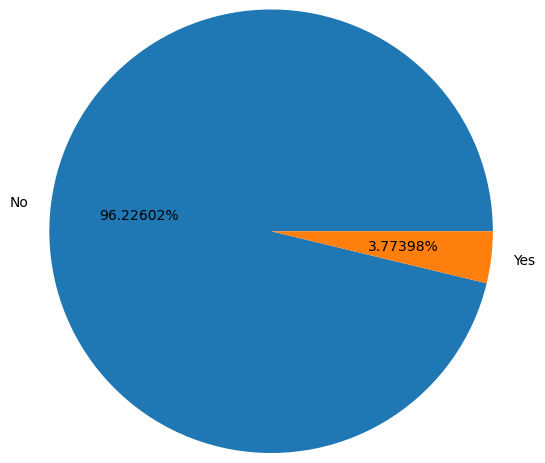

In [16]:
plt.pie(strockValue, labels=strockName,  radius=1.5, autopct="%1.5f%%")

In [17]:
raceVal = df.Race.value_counts().values
raceName = df.Race.value_counts().index

([<matplotlib.patches.Wedge at 0x2e2b9ebeaf0>,
 [Text(-1.2265775024121168, 1.1036338299347541, 'White'),
  Text(0.6044217210930803, -1.5353092141555327, 'Hispanic'),
  Text(1.2611614771067587, -1.0639416002121072, 'Black'),
  Text(1.5394846142002692, -0.5937062595599353, 'Other'),
  Text(1.6229076689791129, -0.2977762548773535, 'Asian'),
  Text(1.6478459415277453, -0.08428376469130167, 'American Indian/Alaskan Native')],
 [Text(-0.6690422740429727, 0.6019820890553204, '76.67787%'),
  Text(0.3296845751416801, -0.8374413895393813, '8.58237%'),
  Text(0.6879062602400501, -0.5803317819338765, '7.17303%'),
  Text(0.8397188804728739, -0.32383977794178287, '3.41719%'),
  Text(0.8852223648976978, -0.1624234117512837, '2.52287%'),
  Text(0.8988250590151337, -0.04597296255889181, '1.62667%')])

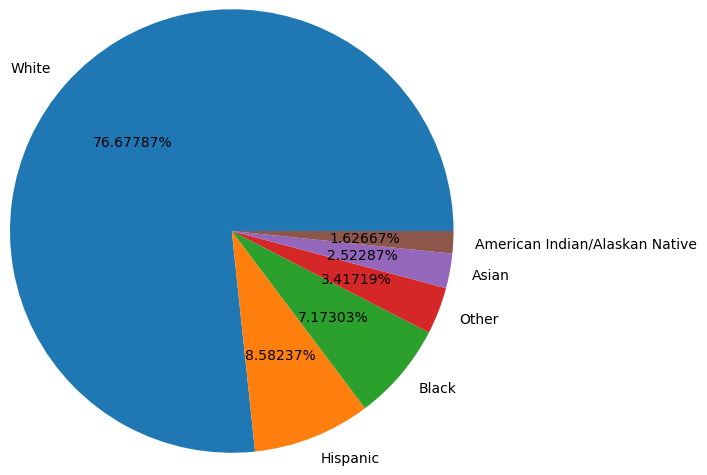

In [18]:
plt.pie(raceVal, labels=raceName,  radius=1.5, autopct="%1.5f%%")

In [19]:
df_ageVal = df.AgeCategory.value_counts().values
df_ageName = df.AgeCategory.value_counts().index

([<matplotlib.patches.Wedge at 0x2e2b9f363a0>,
 [Text(1.5580101511490057, 0.5432350954390307, '65-69'),
  Text(0.8888498503848542, 1.3901244345276513, '60-64'),
  Text(-0.11081197359359493, 1.6462747967785611, '70-74'),
  Text(-1.0177719244398358, 1.2987071686188667, '55-59'),
  Text(-1.5416498225519781, 0.5880610721901718, '50-54'),
  Text(-1.6376941753278647, -0.2011412143176681, '80 or older'),
  Text(-1.3859660453062637, -0.8953201222233957, '45-49'),
  Text(-0.8933653516245847, -1.3872268554626106, '75-79'),
  Text(-0.25338889103321294, -1.6304275727247006, '18-24'),
  Text(0.4227586187032748, -1.594921675290702, '40-44'),
  Text(1.021187578771048, -1.2960231205359438, '35-39'),
  Text(1.434069882742753, -0.8160536571881698, '30-34'),
  Text(1.627164973200275, -0.2735583118644882, '25-29')],
 [Text(0.8498237188085485, 0.29631005205765304, '10.67903%'),
  Text(0.4848271911190113, 0.758249691560537, '10.53362%'),
  Text(-0.060442894687415406, 0.8979680709701241, '9.71404%'),
  Text(

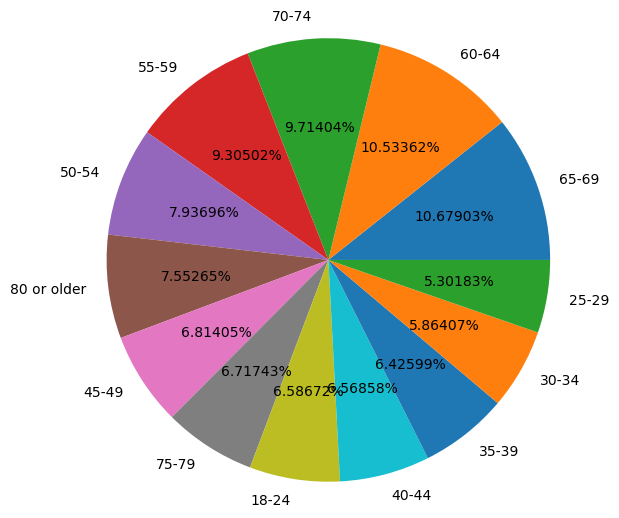

In [20]:
plt.pie(df_ageVal, labels=df_ageName,  radius=1.5, autopct="%1.5f%%")

In [21]:
df.BMI.value_counts()

26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: BMI, Length: 3604, dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='count'>

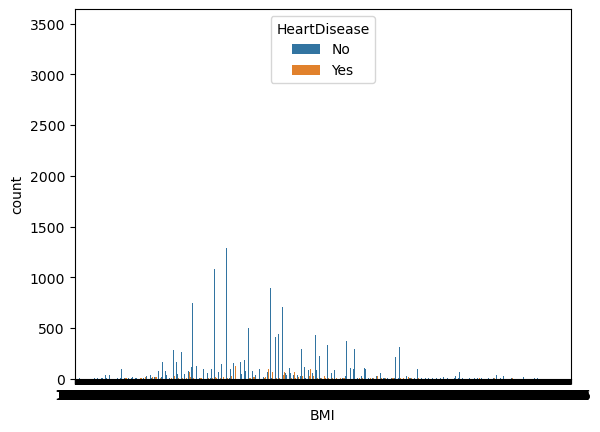

In [22]:
sns.countplot(x='BMI',data=df,hue='HeartDisease')

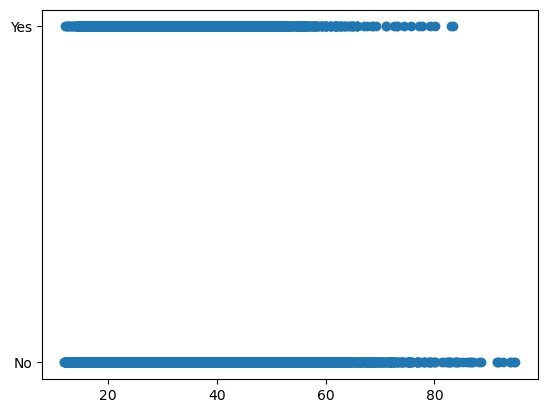

In [23]:
plt.scatter(x=df.BMI,y=df.HeartDisease)

In [24]:
df.Smoking.value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

<AxesSubplot:xlabel='Smoking', ylabel='count'>

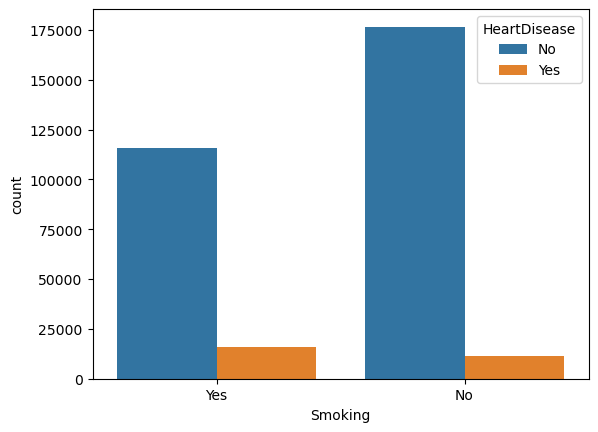

In [25]:
sns.countplot(x='Smoking',data=df,hue='HeartDisease')

<AxesSubplot:>

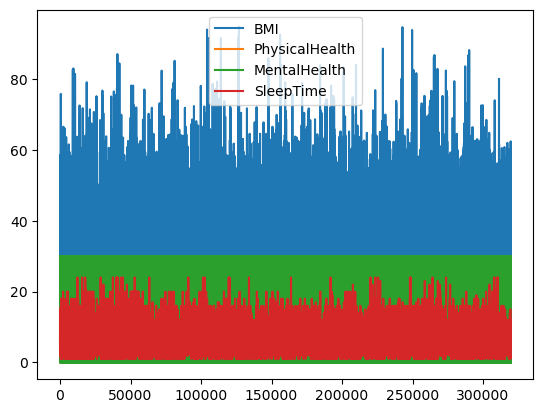

In [26]:
df.plot()

In [27]:
df.AlcoholDrinking.value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

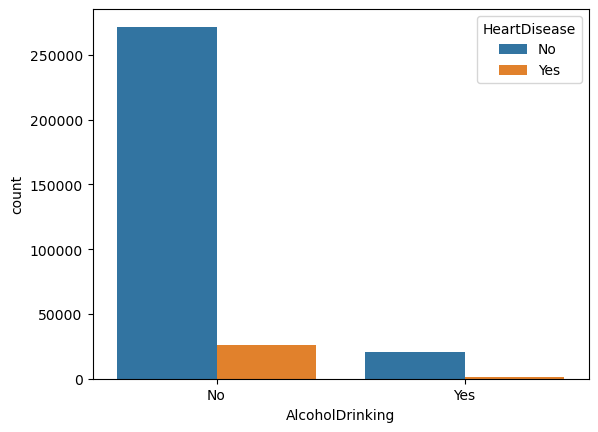

In [28]:
sns.countplot(x='AlcoholDrinking', data=df, hue='HeartDisease')

In [29]:
df.Stroke.value_counts()

No     307726
Yes     12069
Name: Stroke, dtype: int64

<AxesSubplot:xlabel='Stroke', ylabel='count'>

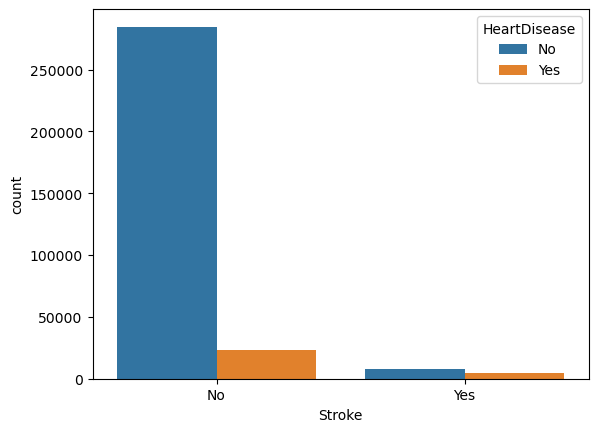

In [30]:
sns.countplot(x='Stroke', data=df, hue='HeartDisease')

<AxesSubplot:xlabel='PhysicalHealth', ylabel='count'>

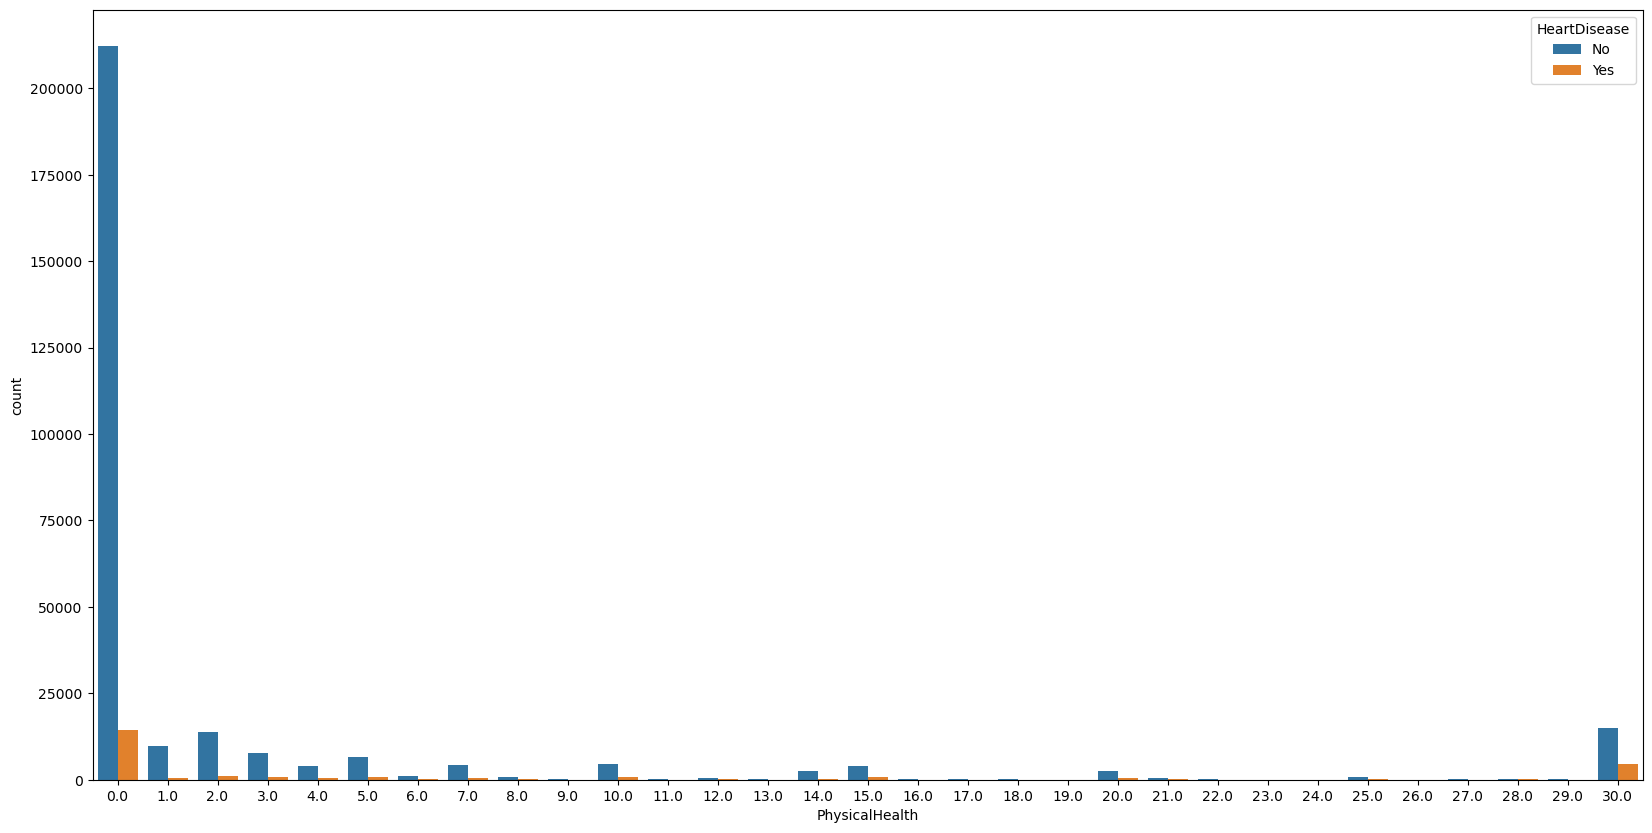

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.PhysicalHealth, data=df, hue='HeartDisease')

<AxesSubplot:xlabel='MentalHealth', ylabel='count'>

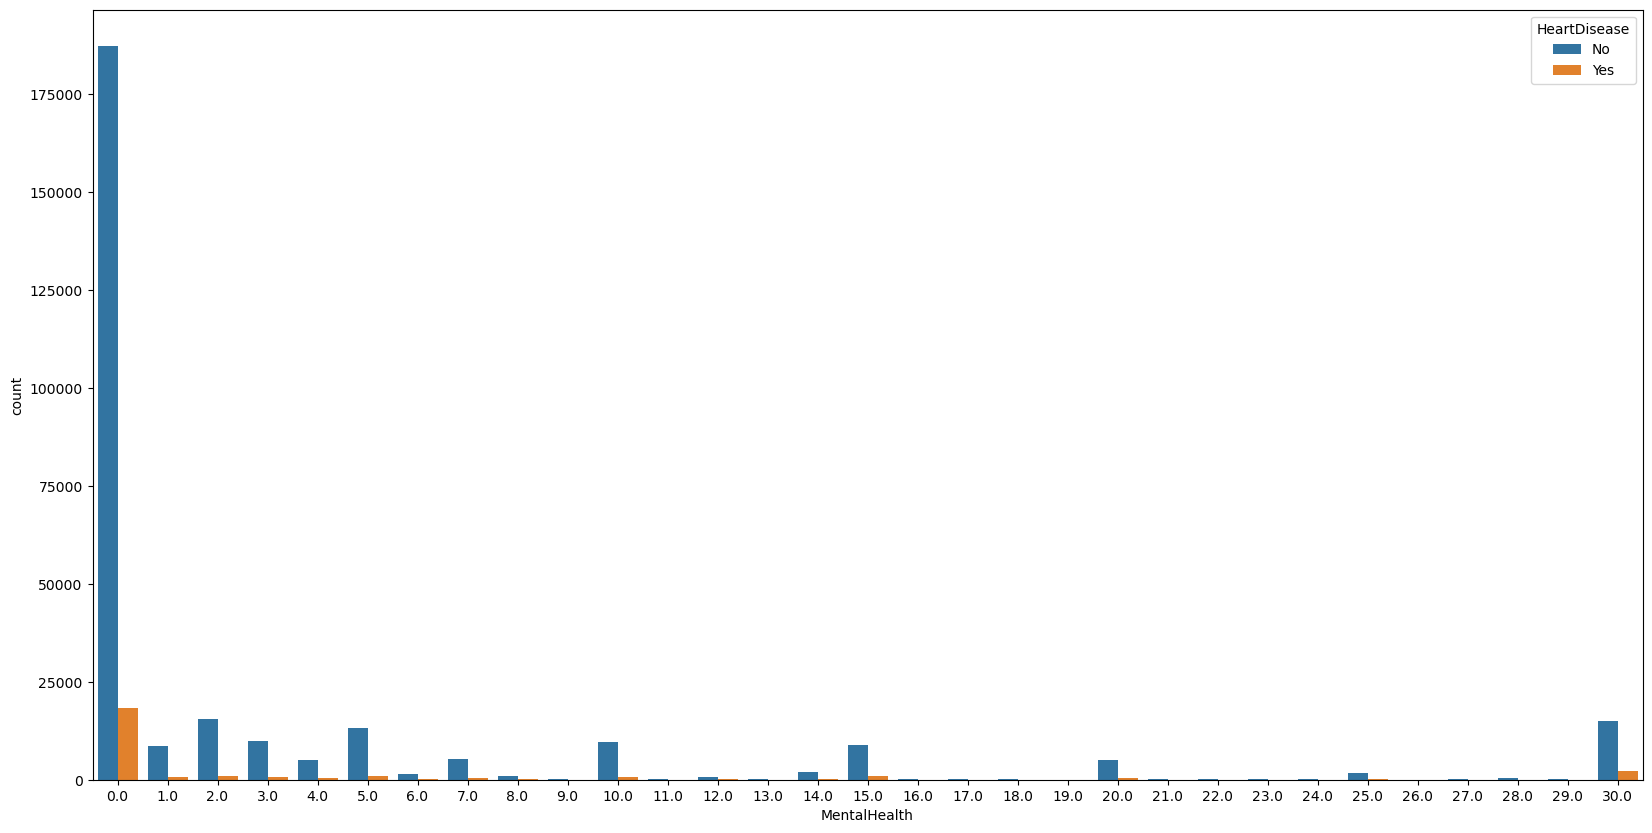

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.MentalHealth, data=df, hue='HeartDisease')

<AxesSubplot:xlabel='DiffWalking', ylabel='count'>

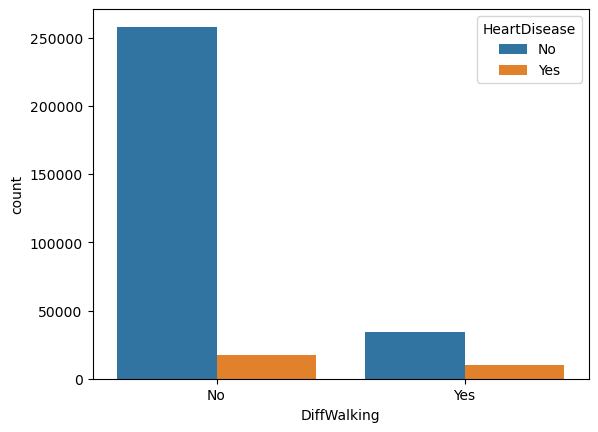

In [33]:
# plt.figure(figsize=(20,10))
sns.countplot(x=df.DiffWalking, data=df, hue='HeartDisease')

In [34]:
df.Sex.value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

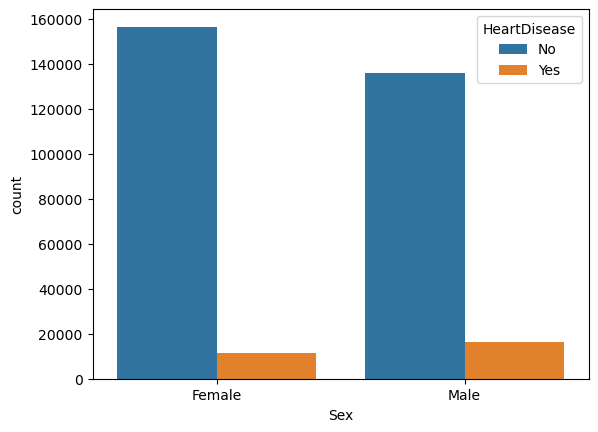

In [35]:
sns.countplot(x='Sex', data=df, hue='HeartDisease')

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

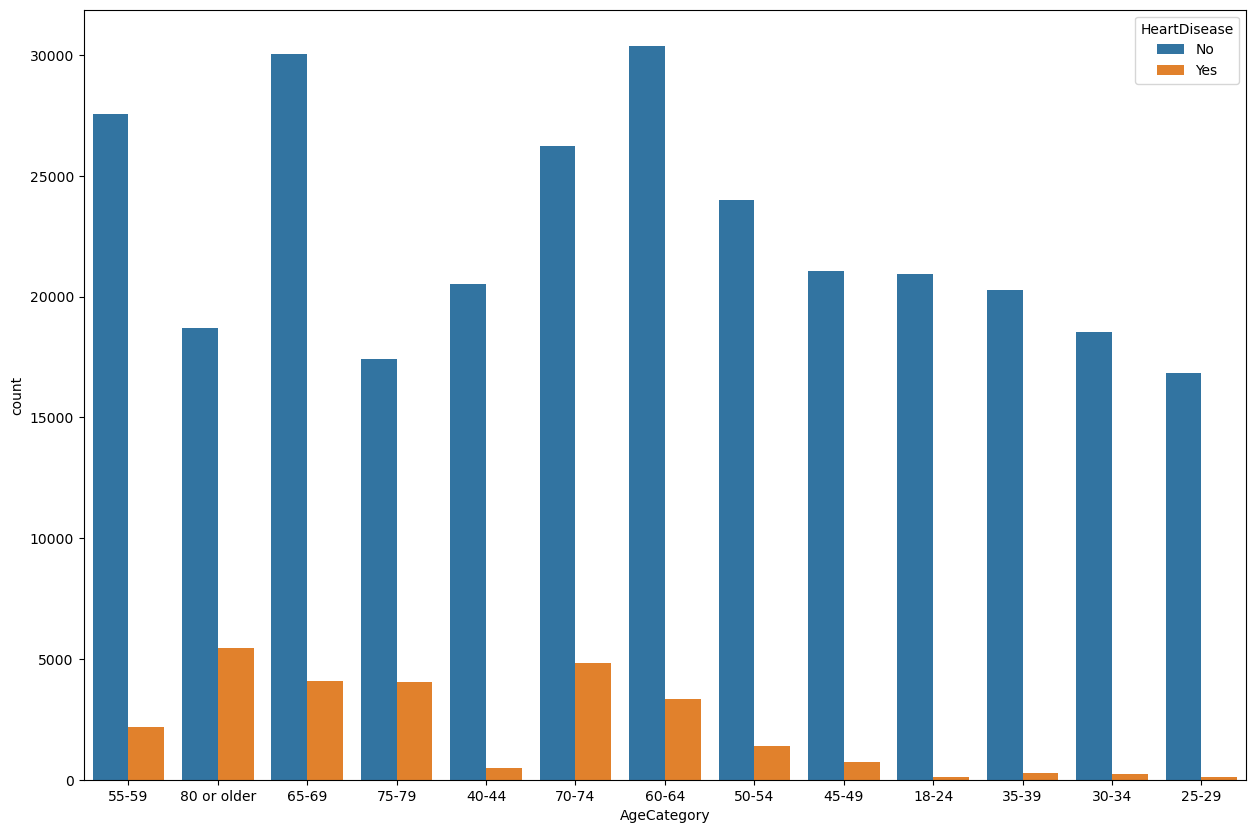

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(x=df.AgeCategory, data=df, hue='HeartDisease')

<AxesSubplot:xlabel='Race', ylabel='count'>

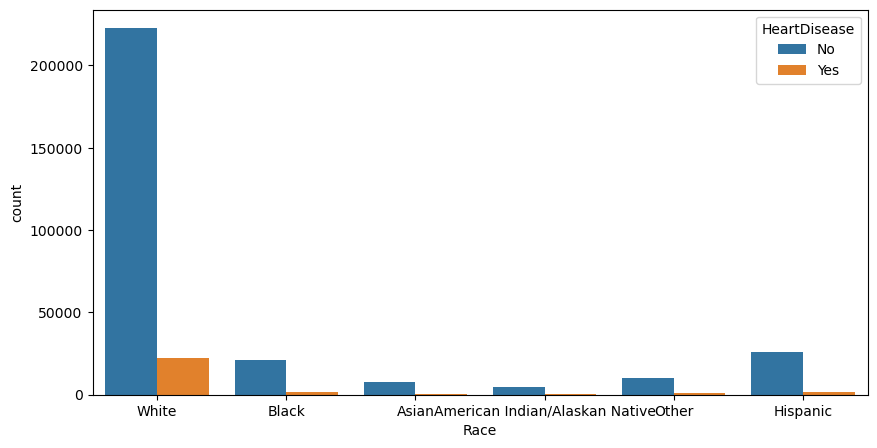

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.Race, data=df, hue='HeartDisease')

<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

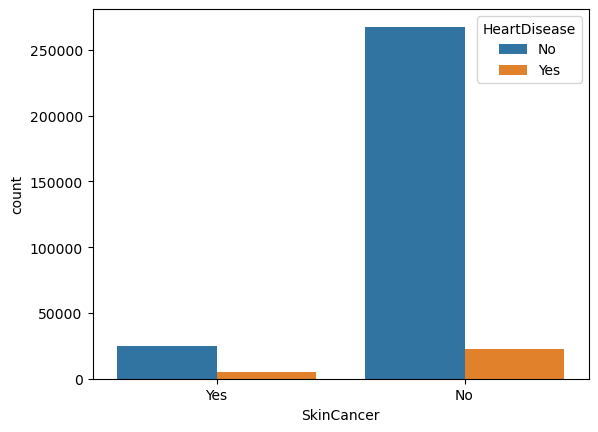

In [38]:
# plt.figure(figsize=(20,10))
sns.countplot(x=df.SkinCancer, data=df, hue='HeartDisease')

In [39]:
df[['SkinCancer', 'HeartDisease']].groupby(['SkinCancer', 'HeartDisease']).size().reset_index()

,SkinCancer,HeartDisease,0
0,No,No,267583
1,No,Yes,22393
2,Yes,No,24839
3,Yes,Yes,4980


In [40]:
df[['KidneyDisease', 'HeartDisease']].groupby(['KidneyDisease', 'HeartDisease']).size().reset_index()

,KidneyDisease,HeartDisease,0
0,No,No,284098
1,No,Yes,23918
2,Yes,No,8324
3,Yes,Yes,3455


In [41]:
df[['Smoking', 'HeartDisease']].groupby(['Smoking', 'HeartDisease']).size().reset_index()

,Smoking,HeartDisease,0
0,No,No,176551
1,No,Yes,11336
2,Yes,No,115871
3,Yes,Yes,16037


In [42]:
df[['Stroke', 'HeartDisease']].groupby(['Stroke', 'HeartDisease']).size().reset_index()

,Stroke,HeartDisease,0
0,No,No,284742
1,No,Yes,22984
2,Yes,No,7680
3,Yes,Yes,4389


<AxesSubplot:xlabel='Smoking', ylabel='count'>

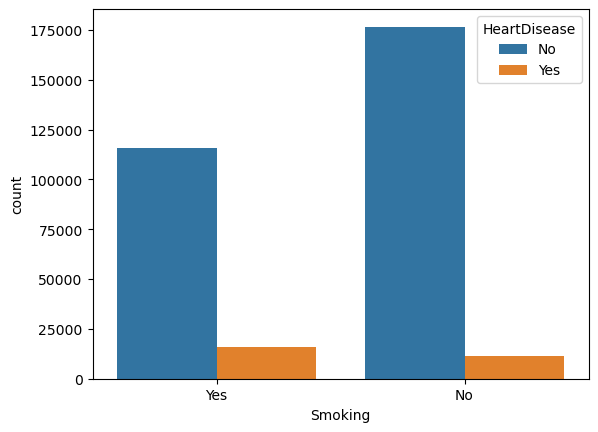

In [43]:
sns.countplot(x=df.Smoking, data=df, hue='HeartDisease')

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

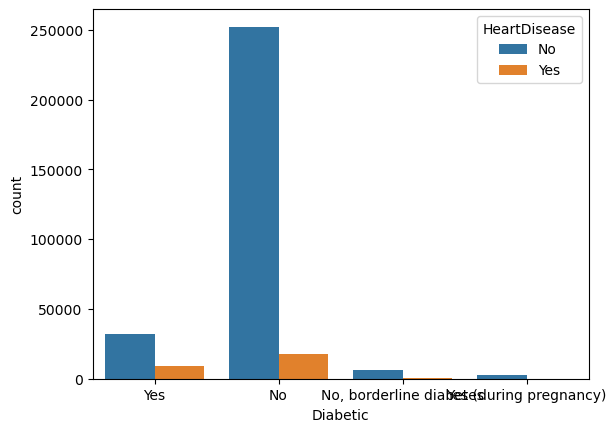

In [44]:
sns.countplot(x='Diabetic', data=df, hue='HeartDisease')

In [45]:
smoking_count = df[['Smoking', 'HeartDisease']].groupby(['Smoking', 'HeartDisease']).size().reset_index().rename(columns={0:'Smoking Count'})
smoking_count.head()

,Smoking,HeartDisease,Smoking Count
0,No,No,176551
1,No,Yes,11336
2,Yes,No,115871
3,Yes,Yes,16037


In [46]:
sleepTime_count = df[['SleepTime', 'HeartDisease']].groupby(['SleepTime', 'HeartDisease']).size().reset_index().rename(columns={0:'SleepTime Count'})
sleepTime_count.head(10)

,SleepTime,HeartDisease,SleepTime Count
0,1.0,No,491
1,1.0,Yes,60
2,2.0,No,660
3,2.0,Yes,128
4,3.0,No,1645
5,3.0,Yes,347
6,4.0,No,6570
7,4.0,Yes,1180
8,5.0,No,17154
9,5.0,Yes,2030


In [47]:
sleepTimeCount = sleepTime_count.sort_values(['SleepTime Count'], ascending=[False])
sleepTimeCount_top10 = sleepTimeCount.head(10)

In [48]:
sleepTimeCount_top10

,SleepTime,HeartDisease,SleepTime Count
12,7.0,No,91426
14,8.0,No,89244
10,6.0,No,61294
8,5.0,No,17154
16,9.0,No,14345
15,8.0,Yes,8358
18,10.0,No,6631
6,4.0,No,6570
13,7.0,Yes,6325
11,6.0,Yes,5427


<AxesSubplot:xlabel='SleepTime Count', ylabel='SleepTime'>

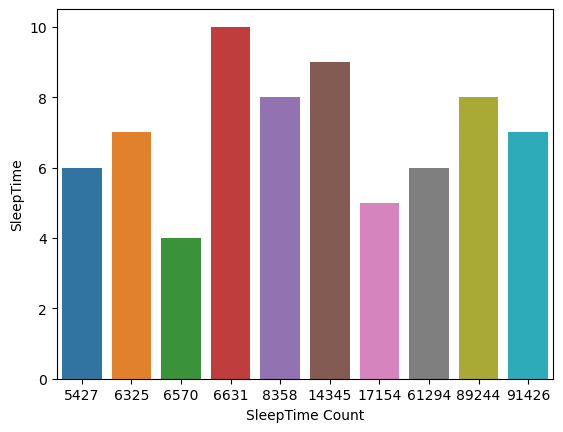

In [49]:
sns.barplot(x='SleepTime Count', y='SleepTime', data=sleepTimeCount_top10)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

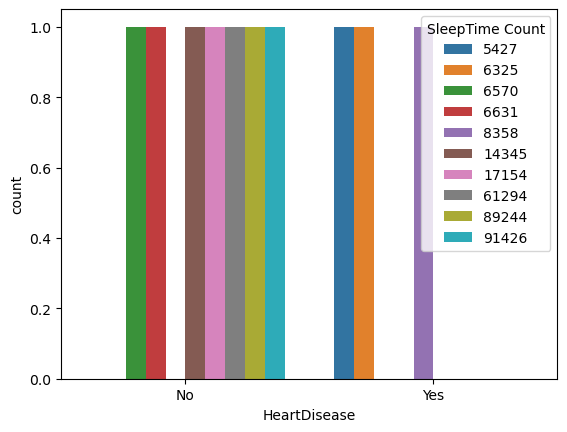

In [50]:
sns.countplot(x='HeartDisease', data=sleepTimeCount_top10, hue='SleepTime Count')

## Label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == np.number:
        continue 
    else:
        df[col] = le.fit_transform(df[col])

In [52]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [53]:
df.shape

(319795, 18)

In [54]:
df.HeartDisease.value_counts() #No = 292422 , YES = 27373

0    292422
1     27373
Name: HeartDisease, dtype: int64

## Exploratory Data Analysis

In [55]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [56]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


<AxesSubplot:>

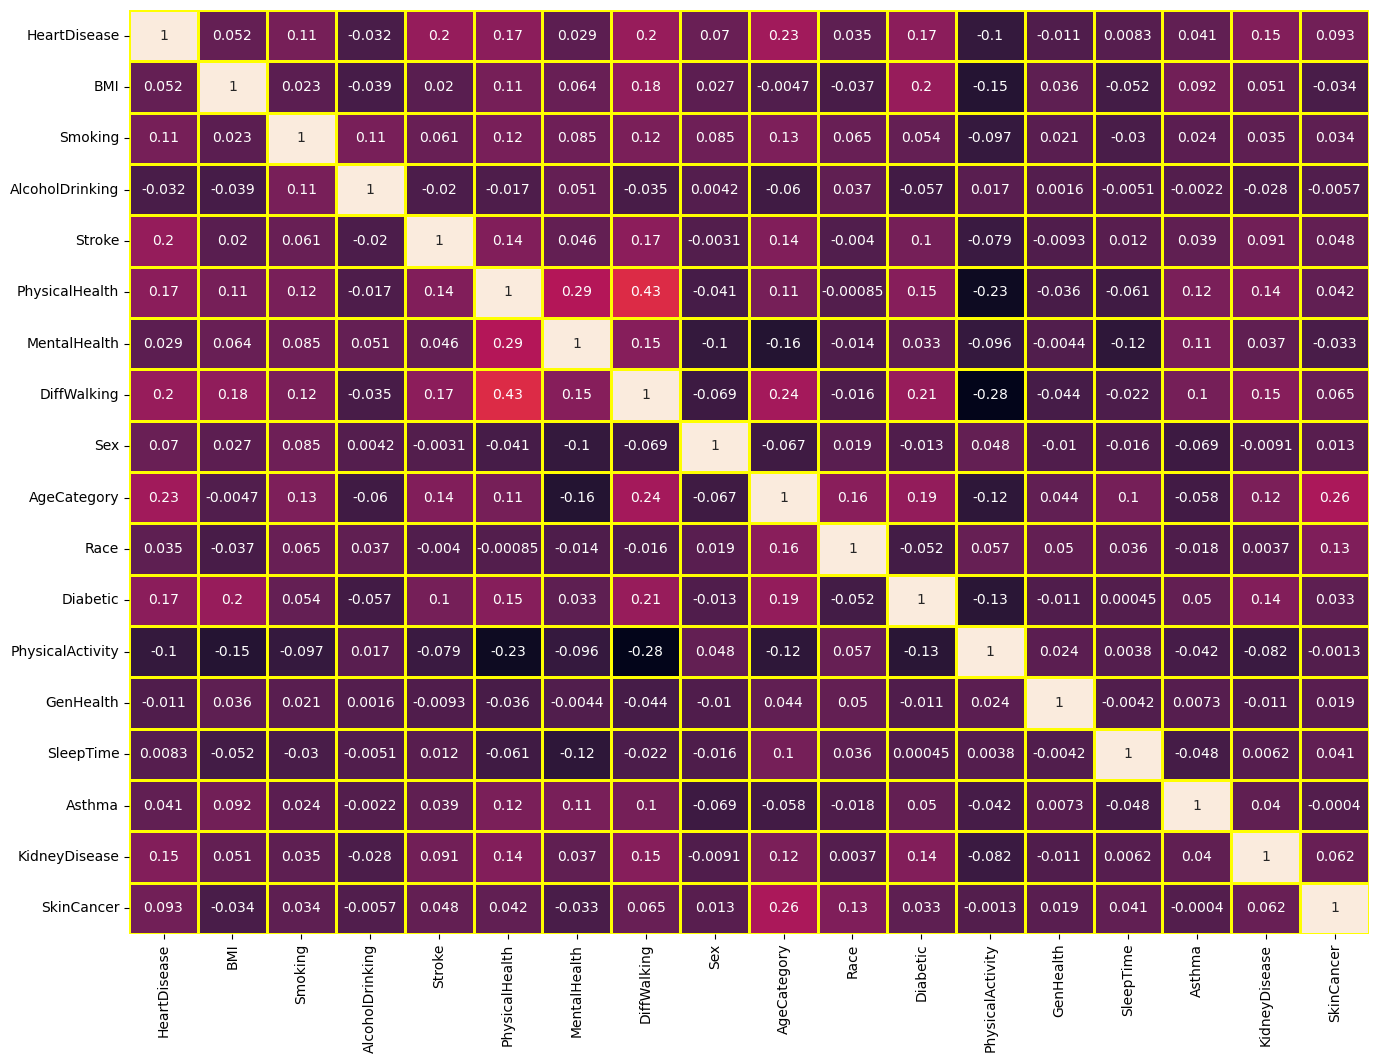

In [57]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True,annot_kws={"size": 10}, linewidths=2, linecolor='yellow', cbar=False)

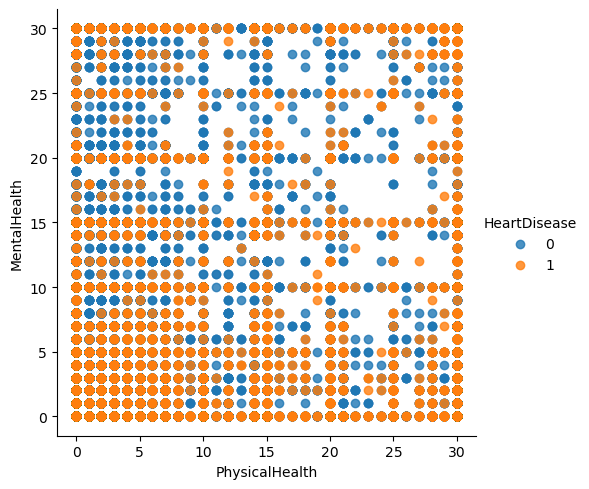

In [58]:
sns.lmplot( x="PhysicalHealth", y="MentalHealth", data=df, fit_reg=False, hue='HeartDisease', legend=True)

# Feature Selection & Class Imbalancing

In [59]:
df.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [60]:
imbalance_value = round(292422/(292422+27373),2)
print(f'{imbalance_value*100}% data is imbalance in Target Column')

91.0% data is imbalance in Target Column


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

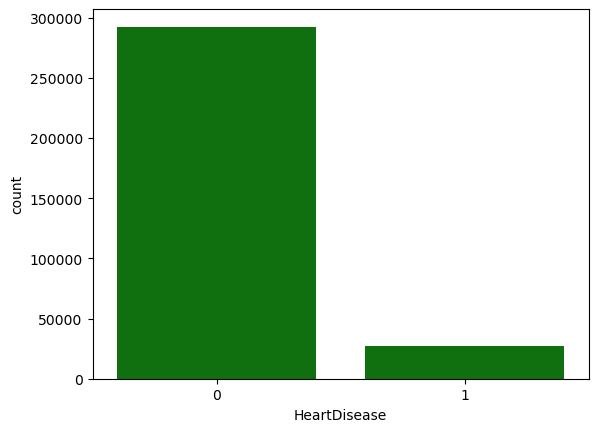

In [61]:
sns.countplot(df['HeartDisease'], color='green')

In [62]:
no_HeartDisease = (292422/(292422+27373)) * 100
yes_HeartDisease = (27373/(292422+27373)) * 100

print(f'According to dataset {yes_HeartDisease}% people has Heart Disease')
print(f'According to dataset {no_HeartDisease}% people has no Heart Disease')

According to dataset 8.559545959130068% people has Heart Disease
According to dataset 91.44045404086994% people has no Heart Disease


In [63]:
#Let's seperate the dataset first before sampling
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [64]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [65]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int32

In [ ]:
#Let's Over Sampling the dataset first

from imblearn.combine import SMOTETomek
sm = SMOTETomek()
X_OverSample, y_OverSample = sm.fit_resample(X,y)

In [67]:
y_OverSample.value_counts()

0    290153
1    290153
Name: HeartDisease, dtype: int64

In [68]:
#Under Sampling the dataset for making the class value balanced
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_UnderSample, y_UnderSample = nm.fit_resample(X,y)

In [69]:
y_UnderSample.value_counts()

0    27373
1    27373
Name: HeartDisease, dtype: int64

In [70]:
print(f'The original Y values is: {y.shape}')
print(f'After Over Sampling the Y values is: {y_OverSample.shape}')
print(f'After Under Sampling the Y values is: {y_UnderSample.shape}')

The original Y values is: (319795,)
After Over Sampling the Y values is: (580306,)
After Under Sampling the Y values is: (54746,)


# Split the data in Train & Test

Here we pick Under Sampling data and split them. We will also split them in folds for probable future usage. 

In [71]:
#Importing Libraries 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [72]:
#spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_UnderSample, y_UnderSample, test_size = .30, random_state=1)

In [73]:
#spliting using kfold
kfold = KFold(n_splits=5, shuffle=True, random_state=2)

In [74]:
fold_number = 1
for train_fold, test_fold, in kfold.split(X_UnderSample, y_UnderSample):
    print(f'Fold:{fold_number}, Train set: {len(train_fold)}, Test set:{len(test_fold)}')
    fold_number += 1

Fold:1, Train set: 43796, Test set:10950
Fold:2, Train set: 43797, Test set:10949
Fold:3, Train set: 43797, Test set:10949
Fold:4, Train set: 43797, Test set:10949
Fold:5, Train set: 43797, Test set:10949


# Fit the Model with various Algorithms

Let's fit the data and create a model with various algorithms

In [75]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)
xgb = XGBClassifier()
ann = tf.keras.models.Sequential()

In [76]:
clfs = {'SVC' : svc,'KNC' : knc, 'DTC': dtc, 'LR': lrc, 'RFC': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc, 'XgB': xgb,}

In [77]:
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

In [78]:
def predict_labels(clf, X_test):
    return (clf.predict(X_test))

In [79]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X_train, y_train)
    pred = predict_labels(v,X_test)
    pred_scores.append((k, [accuracy_score(y_test,pred)]))

In [83]:
model_scores = pd.DataFrame(pred_scores, columns=('Index','Score'))
model_scores

,Index,Score
0,SVC,[0.49665124208475403]
1,KNC,[0.8442523136872869]
2,DTC,[0.8599001461276181]
3,LR,[0.8763395031660984]
4,RFC,[0.8544812469556746]
5,AdaBoost,[0.8920482221139795]
6,BgC,[0.860021919142718]
7,ETC,[0.8469922065270337]
8,XgB,[0.8987457379444715]


In [84]:
#Prepare the ANN for fitting the model
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [85]:
#Fit with ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
1198/1198 [==============================] - 2s 1ms/step - loss: 0.4220 - accuracy: 0.8121
Epoch 2/100
1198/1198 [==============================] - 2s 1ms/step - loss: 0.3257 - accuracy: 0.8652
Epoch 3/100
1198/1198 [==============================] - 2s 1ms/step - loss: 0.3069 - accuracy: 0.8738
Epoch 4/100
1198/1198 [==============================] - 2s 1ms/step - loss: 0.2989 - accuracy: 0.8764
Epoch 5/100
1198/1198 [==============================] - 2s 1ms/step - loss: 0.2953 - accuracy: 0.8785
Epoch 6/100
1198/1198 [==============================] - 2s 1ms/step - loss: 0.2919 - accuracy: 0.8797
Epoch 7/100
1198/1198 [==============================] - 2s 1ms/step - loss: 0.2895 - accuracy: 0.8803
Epoch 8/100
1198/1198 [==============================] - 2s 1ms/step - loss: 0.2859 - accuracy: 0.8816
Epoch 9/100
1198/1198 [==============================] - 2s 1ms/step - loss: 0.2840 - accuracy: 0.8834
Epoch 10/100
1198/1198 [==============================] - 2s 1ms/step - l

In [86]:
#ANN Accuracy Score
ann_pred = ann.predict(X_test)
ann_score = accuracy_score(y_test,pred)
ann_score

514/514 [==============================] - 1s 865us/step


0.8987457379444715

In [87]:
#Fit with Kfolds
kfold_score = cross_val_score(xgb, X_test, y_test, cv=kfold)
kfold_score

array([0.89041096, 0.89315068, 0.89497717, 0.895586  , 0.88824604])

In [88]:
#Let's fit he model with Another Algorithm
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')
eclf.fit(X_train,y_train)
vt_pred = eclf.predict(X_test)
vt_score = eclf.score(X_test,y_test)
vt_score

0.8549074525085241

# Hyper Parameter Tuning

After fitting the model with many algorithms we found XgBoost scored better. So now we will try to increase our score performing hyper parameter tuning of Xgb.

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [90]:
params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'max_depth':[4,5,6,8,10],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

print(params)

{'max_depth': [4, 5, 6, 8, 10], 'min_child_weight': range(1, 6, 2), 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]}


In [91]:
tuning_xgb_clf = XGBClassifier()
tuning_xgb_rcv = RandomizedSearchCV(tuning_xgb_clf, params, n_iter=200, cv=3)
tuning_xgb_rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [92]:
tuning_xgb_rcv.cv_results_

{'mean_fit_time': array([0.49751369, 0.80939404, 0.55786554, 0.33302379, 0.33367713,
        0.76258977, 0.72303025, 0.7375288 , 0.75097251, 0.42231353,
        0.57790017, 0.66006152, 0.3449769 , 0.31968244, 0.63880269,
        0.30361438, 0.67562191, 0.3062079 , 0.3258818 , 0.53376508,
        0.39900517, 0.47084896, 0.50089081, 0.6003871 , 0.79156637,
        0.40314468, 0.60107708, 0.33684969, 0.32364551, 0.30402414,
        0.40375614, 0.4958051 , 0.57308793, 0.33060567, 0.41996201,
        0.74300623, 0.57578985, 0.33927798, 0.54649552, 0.34095875,
        0.67611949, 0.68608205, 0.41439231, 0.56826846, 0.73145159,
        0.30711881, 0.69421458, 0.49493313, 0.80924463, 0.65788062,
        0.5346601 , 0.43093014, 0.31444804, 0.30779568, 0.77713943,
        0.54851786, 0.45952773, 0.30954806, 0.68393183, 0.53041371,
        0.42430933, 0.33309515, 0.43121823, 0.33498494, 0.50054463,
        0.60498579, 0.65219712, 0.39057239, 0.46434037, 0.34699392,
        0.72890703, 0.53640079,

In [93]:
best_params = tuning_xgb_rcv.best_params_
best_params

{'subsample': 0.9,
 'reg_alpha': 0.01,
 'min_child_weight': 1,
 'max_depth': 4,
 'gamma': 0.0,
 'colsample_bytree': 0.8}

In [94]:
tuning_xgb_rcv.best_score_

0.895255988727102

In [95]:
tune_clf = tuning_xgb_rcv.best_estimator_
tune_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [96]:
tuning_score = tune_clf.score(X_test, y_test)
tuning_score

0.8993546030199707

In [97]:
tune_pred = tune_clf.predict(X_test)
cm = confusion_matrix(tune_pred, y_test)
cm

array([[7839, 1225],
       [ 428, 6932]], dtype=int64)

<AxesSubplot:>

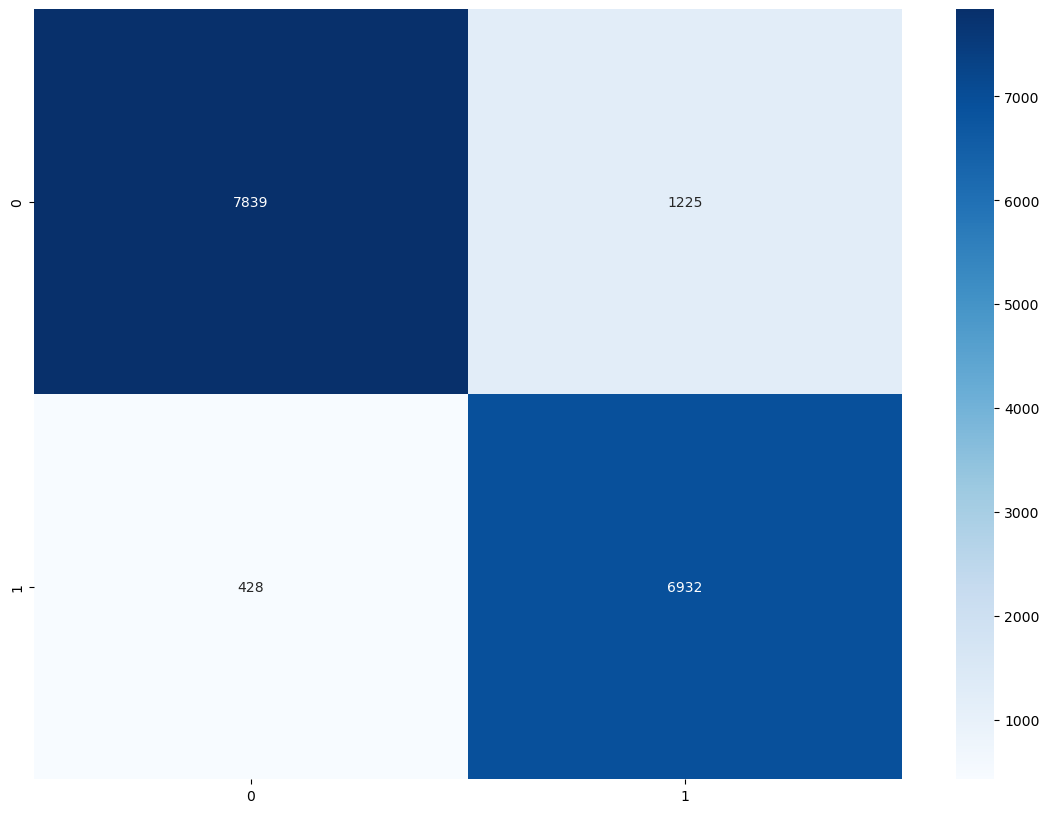

In [98]:
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

In [99]:
tp, fn, fp, tn = confusion_matrix(y_test, tune_pred).reshape(-1)
print('This is True Positive: ', tp)
print('This is True Negetive: ', tn)
print('This is False Positive: ', fp)
print('This is False Negetive: ', fn)

This is True Positive:  7839
This is True Negetive:  6932
This is False Positive:  1225
This is False Negetive:  428
